# Learning through Spike-Timing Dependent Plasticity (STDP)

## Hebbian Learning

[Donald Hebb](https://en.wikipedia.org/wiki/Donald_O._Hebb) was a researcher who tried to understand how synaptic connections between neurons change over time in order to enable learning. Hebb theorized that when two neurons fire at similar times, any synaptic connections between them will be strengthened. Hebbian theory can be summarized as *"neurons that fire together wire together"*.

But we need to get more specific; order matters. If we have neurons A and B, and a connection from A to B (A -> B) then this connection would be **strengthened if B fires immediately *after* A** because it is likely that A caused B to fire. However, **if B fires immediately *before* A then the connection will be weakened** because A did *not* cause B to fire.

## Spike-Timing Dependent Plasticity (STDP)

STDP is a family of update rules for implementing Hebbian learning. Let's focus on two neurons, which we will call "pre" and "post". In STDP, if we believe that "pre" **causes** "post" to fire then we strengthen the connection between them so that "post" ends up being even more likely to fire after "pre" fires.

Let's focus even more specifically on situations where "pre" and "post" fire at times $t_{pre}$ and $t_{post}$ respectively. So if "pre" fires before "post" ($t_{pre} < t_{post}$) then the connection between "pre" and "post" should be *strengthened*; it is likely that "pre" caused "post" to fire. If "pre" fires after "post" ($t_{pre} \geq t_{post}$) then the connection between "pre" and "post" should be *weakened*. Note that we are including simultaneous firing where $t_{pre} = t_{post}$ because if they fire at the same time, it is unlikely that "pre" caused "post" to fire...but whether that makes sense to do or not depends on the simulation setup (for example, if a presynaptic neuron could cause a postsynaptic neuron to fire on the same timestep in a discrete simulation).

Let's define $w$ to be the weight between "pre" and "post". If $w$ is large then "post" will be more likely to fire when "pre" fires ("pre" firing caries more weight/influence on "post"). If $w$ is small then "pre" has little to no effect on "post". We could also allow $w$ to be negative so that if "pre" fires, "post" would be less likely to fire.

Again, we are only focused on one firing of "pre" (at $t_{pre}$) and "post" (at $t_{post}$). So now, we ask the question of **how much** our weight $w$ should change based on the exact values of $t_{pre}$ and $t_{post}$. We will only change our weight after both "pre" and "post" have fired so that we know how to change $w$. We'll refer to the amount we change $w$ as $\Delta{}w$. If $\Delta{}w$ is positive, we increase the strength of the connection of "pre" to "post" if $\Delta{}w$ is negative, we decrease the strength.

### Update Rules

For now, let's focus on cases where "pre" fires _before_ "post" ($t_{pre} < t_{post}$). The more clearly associated "pre" and "post" are, the larger $\Delta{}w$ should be. If "post" fires *immediately* after "pre" then it's fairly likely that "pre" caused "post" to fire so $\Delta{}w$ should be larger. If "post" fires *a long time* after "pre" has fired then it's not likely that "pre" caused "post" to fire (since the influence of the spike decreased over time) so $\Delta{}w$ should be closer to $0$.

Conversely, if we focus on cases where "pre" fires _after_ "post" ($t_{pre} \geq t_{post}$) then $\Delta{}w$ will be negative. If "pre" fires a long time after "post" then $\Delta{}w$ should only be slightly negative, since we aren't necessarily sure what effect "pre" has on "post". But the closer $t_{pre}$ is to $t_{post}$ (while still occuring after), the more negative we can make $\Delta{}w$, since we can be more sure that "pre" did **not** cause "post" to fire.

The effect of "pre" on "post" decays exponentially with time, so it makes sense to make $\Delta{}w$ also depend on the exponential difference between $t_{pre}$ and $t_{post}$: $e^{(t_{pre}-t_{post})}$. Let's also create time constants to specify how quickly our influence decays. We'll use $\tau_{+}$ and $\tau_{-}$ as time constants to represent how quickly our $\Delta{}w$ update goes to $0$ if $t_{pre} < t_{post}$ or if $t_{pre} \geq t_{post}$ respectively. We'll also introduce two constants $A_{+}$ and $A_{-}$ to scale $\Delta{}w$ if $t_{pre} < t_{post}$ or if $t_{pre} \geq t_{post}$ respectively.

So we end up the update rules:

$$
\Delta{}w =
\begin{cases}
  A_+e^{\frac{(t_{pre}-t_{post})}{\tau_+}}, & \text{if } t_{pre} < t_{post} \\
  -A_{-}e^{\frac{-(t_{pre}-t_{post})}{\tau_{-}}}, & \text{if } t_{pre} \geq t_{post}
\end{cases}
$$

Let's graph out the value of $\Delta{}w$ with respect to $t_{pre}-t_{post}$. We'll first define variables `a_plus` to represent $A_+$, `a_minus` to represent $A_-$, `tau_plus` to represent $\tau_+$, and `a_minus` to represent $\tau_-$.

Our definition of $\Delta{}w$ is **time-invariant** with respect to $t_{pre} - t_{post}$, meaning that it does not depend on the exact time but only the difference between the two times (i.e., if $t_{pre} - t_{post} = 5$ then it doesn't matter what the exact value of $t_{pre}$ was). So let's graph out $\Delta{}w$ with respect to $t_{pre} - t_{post}$:

We'll define the function `getDW` to accept two inputs that represent $t_{pre}$ and $t_{post}$ (`t_pre` and `t_post` respectively) and return $\Delta{}w$:

In [1]:
import numpy as np

def getDW(t_pre, t_post, a_plus=0.01, tau_plus=20, a_minus=0.011, tau_minus=20):
    if t_pre <= t_post:
        return a_plus*np.exp((t_pre - t_post)/tau_plus)
    else:
        return -a_minus*np.exp(-(t_pre - t_post)/tau_minus)

And plot it's value (note that since `getDW` is time invariant, we're just going to leave $t_{post}$ fixed at `0` and vary $t_{pre}$):

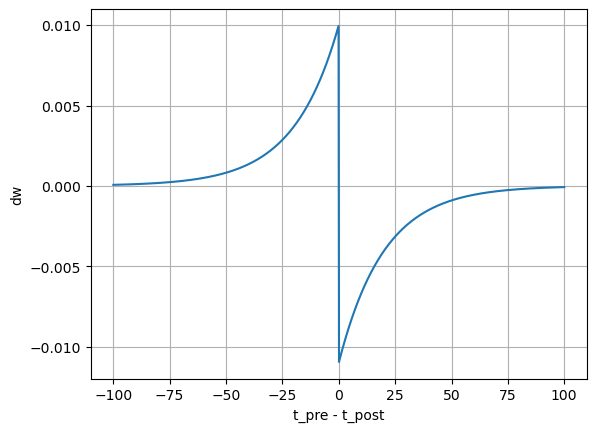

In [2]:
import matplotlib.pyplot as plt

t_pre = np.linspace(-100, 100, 1000)
t_post = 00
dw = [getDW(t, t_post) for t in t_pre]

plt.plot(t_pre, dw)
plt.xlabel('t_pre - t_post')
plt.ylabel('dw')
plt.grid(True)
plt.show()

In [3]:
class STDPWeights:
    def __init__(self, numPre, numPost, tau_plus = 0.02, tau_minus = 0.02, a_plus = 0.01, a_minus = 0.011, g_min=0, g_max=1):
        self.numPre = numPre
        self.numPost = numPost
        self.tau_plus = tau_plus
        self.tau_minus = tau_minus
        self.a_plus = a_plus
        self.a_minus = a_minus
        self.x = np.zeros(numPre)
        self.y = np.zeros(numPost)

        self.g_min = g_min
        self.g_max = g_max
        self.w = np.zeros((numPre, numPost)) # A 2-D array; numPre x numPost zeros (normally would be random)


    def step(self, t_step):
        self.x = self.x * np.exp(-t_step/self.tau_plus)
        self.y = self.y * np.exp(-t_step/self.tau_minus)

    def updateWeights(self, preOutputs, postOutputs):
        self.x += (preOutputs  > 0) * self.a_plus
        self.y -= (postOutputs > 0) * self.a_minus

        alpha_g = self.g_max - self.g_min # Scaling factor for weight updates

        preSpikeIndices = np.where(preOutputs > 0)[0]   # Indices of pre-synaptic   spiking neurons
        postSpikeIndices = np.where(postOutputs > 0)[0]

        for ps_idx in preSpikeIndices:
            self.w[ps_idx] += alpha_g * self.y
            self.w[ps_idx] = np.clip(self.w[ps_idx], self.g_min, self.g_max)

        for ps_idx in postSpikeIndices:
            self.w[:, ps_idx] += alpha_g * self.x
            self.w[:, ps_idx] = np.clip(self.w[:, ps_idx], self.g_min, self.g_max)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

SIM_PER_TIME = 100

def str2spikes(s, max_length=None, dt_per_char=SIM_PER_TIME, offset=0):
    if max_length is None: max_length = len(s)

    spikes = []
    for i in range(max_length):
        for _ in range(offset):
            spikes.append(False)
        spikes.append(i < len(s) and s[i] != ' ')
        for _ in range(dt_per_char - offset - 1):
            spikes.append(False)

    return spikes

def clone(arr):
    return arr[:]

def clone2d(arr):
    return [clone(a) for a in arr]

def plotDWView(pre_spike_strs, post_spike_strs, show_w=True, options=None, offsets={}, gmin=0, gmax=1, tau_plus=20.0, tau_minus=20.0, a_plus=0.01, a_minus=0.011):
    if options is None:
        options = {}
        
    max_length_string = max(len(s) for s in pre_spike_strs+post_spike_strs)
    pre_spikes  = [str2spikes(ps, int(max_length_string * 1.2), offset=offsets.get(('pre', idx), 0)) for idx, ps in enumerate(pre_spike_strs)]
    post_spikes = [str2spikes(ps, int(max_length_string * 1.2), offset=offsets.get(('post', idx), 0)) for idx, ps in enumerate(post_spike_strs)]

    all_spikes = pre_spikes + post_spikes

    padding = options.get('display', {}).get('padding', 5)
    label_width = 30
    padding_left = padding + label_width + padding
    padding_between_spike_view = 5
    padding_between_graphs = 20
    padding_between_weight_view = 5

    per_spike_height = 15
    per_graph_height = 70
    per_w_height = 100 if show_w else 0
    
    num_pre_neurons  = len(pre_spikes)
    num_post_neurons = len(post_spikes)
    
    spike_display_height = per_spike_height * (num_pre_neurons + num_post_neurons)
    graph_display_height = per_graph_height * (num_pre_neurons + num_post_neurons)
    dw_display_height = (per_w_height + padding_between_weight_view) * num_post_neurons
    
    height = spike_display_height + graph_display_height + padding_between_spike_view * (num_pre_neurons + num_post_neurons) + dw_display_height + 2 * padding + padding_between_graphs * (num_pre_neurons + num_post_neurons - 1)
    width = options.get('display', {}).get('width', 1000)
    
    fig, ax = plt.subplots(figsize=(width / 100, height / 100))
    
    all_spikes = pre_spikes + post_spikes
    
    sim_time = max(len(s) for s in all_spikes)
    
    # Initialize weights and other variables
    x = np.zeros((sim_time, num_pre_neurons))
    y = np.zeros((sim_time, num_post_neurons))
    w = np.zeros((sim_time, num_pre_neurons, num_post_neurons))
    
    dt = 10 / SIM_PER_TIME
    weights = STDPWeights(num_pre_neurons, num_post_neurons, tau_plus=tau_plus, tau_minus=tau_minus, a_plus=a_plus, a_minus=a_minus, g_min=gmin, g_max=gmax)

    for t in range(sim_time-1):
        preSpikes  = np.array([s[t] for s in pre_spikes])
        postSpikes = np.array([s[t] for s in post_spikes])

        weights.step(dt)
        weights.updateWeights(preSpikes, postSpikes)

        x[t+1] = clone(weights.x)
        y[t+1] = clone(weights.y)
        w[t+1] = clone2d(weights.w) if len(weights.w) > 0 else np.zeros((num_pre_neurons, num_post_neurons))
    
    
    spike_scale_x = np.linspace(padding_left, width + padding, sim_time)
    
    for i in range(num_pre_neurons + num_post_neurons):
        is_pre_synaptic = i < num_pre_neurons
        is_post_synaptic = not is_pre_synaptic
        spikes = all_spikes[i]
        neuron_index = i if is_pre_synaptic else i - num_pre_neurons
        color = plt.get_cmap('tab10')(neuron_index if is_pre_synaptic else 9 - (neuron_index % 10))
        y_loc = padding + i * (per_spike_height + per_graph_height + padding_between_graphs + padding_between_spike_view) + (is_post_synaptic * (per_w_height + padding_between_weight_view) * neuron_index)

        ax.add_patch(plt.Rectangle((padding, y_loc), label_width, per_spike_height + per_graph_height + padding_between_spike_view + (0 if is_pre_synaptic else (per_w_height + padding_between_weight_view)), edgecolor='#333', facecolor='#EEE' if is_pre_synaptic else '#777'))
        ax.text(padding + label_width / 2, y_loc + (per_spike_height + per_graph_height + padding_between_spike_view + (0 if is_pre_synaptic else (per_w_height + padding_between_weight_view))) / 2, f"{'pre' if is_pre_synaptic else 'post'} #{neuron_index + 1}", ha='center', va='center', rotation='vertical', fontsize=10, color='#333' if is_pre_synaptic else '#EEE')
        
        spike_times = [t for t, spike in enumerate(spikes) if spike]

        
        for t in spike_times:
            display_x = spike_scale_x[t]
            ax.plot([display_x, display_x], [y_loc, y_loc + per_spike_height], color=color, linewidth=5)
            ax.plot([display_x, display_x], [y_loc, height], color=color, linewidth=1, linestyle=(0, (1, 7)))

        
        trace_var = x if is_pre_synaptic else y
        trace_val = trace_var[:, neuron_index]
        max_trace_val = np.max(np.abs(trace_val))
        ax.plot(spike_scale_x[:len(trace_val)], -trace_val*(per_graph_height / max_trace_val) + y_loc + per_spike_height + padding_between_spike_view + (per_graph_height if is_pre_synaptic else 0), color=color)
        
        if is_post_synaptic and show_w:
            max_prepost_w = np.max(np.abs(w[:, :, neuron_index]))
            for pre_neuron_index in range(num_pre_neurons):
                pre_color = plt.get_cmap('tab10')(pre_neuron_index)
                prepost_w = w[:, pre_neuron_index, neuron_index]
                ax.plot(spike_scale_x[:len(prepost_w)], -prepost_w*(per_w_height / max_prepost_w) + y_loc + per_graph_height + per_spike_height + per_w_height + 2*padding_between_spike_view, color=pre_color)
    
    plt.gca().invert_yaxis() 
    
    # remove axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # remove ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)

    plt.show()

# Implementing STDP

Let's actually implement STDP in code. We are going to define a class `STDPWeights`. When working with large numbers of spikes, it would not be computationally efficient to call a function like `getDW` with every combination of spikes. Instead, we can do something that is equivalent but much more efficient by tracking two variables: $x[t]$ to represent the presynaptic neuron and $y[t]$ to represent the postsynaptic neuron. $x[t]$ and $y[t]$ decay according to the time constants $\tau_{+}$ and $\tau_{-}$ respectively:

- $x[t+1] = x[t]e^{-\frac{\Delta{}T}{\tau_{+}}}$
- $y[t+1] = y[t]e^{-\frac{\Delta{}T}{\tau_{-}}}$

Let's define our `STDPWeights` class, with arguments:

- `numPre`: the number of presynaptic neurons
- `numPost`: the number of postsynaptic neurons
- `tau_plus`: to represent $\tau_{+}$
- `tau_minus`: to represent $\tau_{-}$

It also has instance variables to track `numPre`, `numPost`, `tau_plus`, and `tau_minus`. It has instance variables `self.x` and `self.y` to represent the current values of $x$ and $y$.

```python
class STDPWeights:
    def __init__(self, numPre, numPost, tau_plus = 0.02, tau_minus = 0.02):
        self.numPre = numPre
        self.numPost = numPost
        self.tau_plus = tau_plus
        self.tau_minus = tau_minus
        self.x = np.zeros(numPre)
        self.y = np.zeros(numPost)

    def step(self, t_step):
        self.x = self.x * np.exp(-t_step/self.tau_plus)
        self.y = self.y * np.exp(-t_step/self.tau_minus)
```

Then, we can update both when a neuron spikes:

- when the pre-synaptic neuron spikes, we increment $x(t)$ by $x(t) = x(t) + A_{+}$
- when the post-synaptic neuron spikes, we increment $y(t)$ by $y(t) = y(t) - A_{-}$

Let's first augment our constructor to include more arguments:
- `a_plus`: to represent $A_{+}$
- `a_minus`: to represent $A_{-}$

And let's add a new function to update `self.x` and `self.y` in reaction to pre-synaptic and post-synaptic spikes. We'll call this `updateWeights` (we'll *actually* update the weights later on). It will accept two arguments: the pre-synaptic outputs (a list of numbers like `[0, 0, 1]` to represent the output of three neurons, with the third one firing) and the post-synaptic outputs (in the same format).

The first things we will do is to find the *indices* of the spiking neurons. For example, if our outputs are `[1, 0, 1, 0]` then we want to get `[0, 2]` (the indices of the values greater than zero).

And then we increment those rules for each value:
- when the pre-synaptic neuron spikes, increment that item in `self.x` by `self.a_plus`
- when the post-synaptic neuron spikes, increment that item in `self.y` by `-self.a_minus`

```python
def updateWeights(self, preOutputs, postOutputs):
    self.x += (preOutputs  > 0) * self.a_plus
    self.y -= (postOutputs > 0) * self.a_minus
```

Let's see what this looks like for some example spike trains. Let's look at how a pre-synaptic neuron looks. Every time it spikes, $x(t)$ increments (spikes are blue lines and the plot below shows $x(t)$):

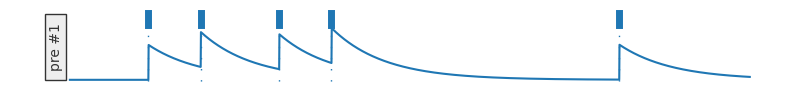

In [27]:
plotDWView(['   x x  x x          x'], [], False)

Conversely, when a post-synaptic neuron spikes, $y(t)$ decrements:

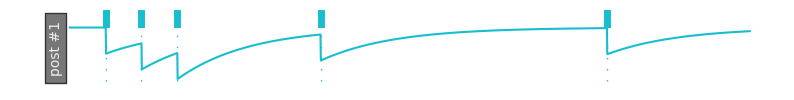

In [28]:
plotDWView([], [' xxx   x       x'], False)

Now, suppose we have a pre-synaptic neuron and a post-synaptic neuron. There is some synaptic weight $w(t)$ that varies over time. We first assume that the synaptic conductance must be in the range $[g_{min}, g_{max}]$. We can initialize it randomly within that range. We'll then scale our updates by the difference, $\alpha_g = g_{max} - g_{min}$.

- when the pre-synaptic neuron spikes, we increment every post-synaptic weight $w(t)$ by $w(t) = w(t) + \alpha_g y(t)$
- when the post-synaptic neuron spikes, we increment every pre-synaptic weight $w(t)$ by $w(t) = w(t) + \alpha_g x(t)$

So let's update our `STDPWeights` class. First, we will add two additional constructor arguments:

- `g_min` to represent $g_{min}$
- `g_max` to represent $g_{max}$

And let's create a 2-D array, `self.w`, to represent the weights from each pre-synaptic neuron to each post-synaptic neuron. Our 2-D array will have `numPre` items, each item being a list of `numPost` numbers. So if we want the weight of the synapse from pre-synaptic neuron `i` to post-synaptic neuron `j`, we will access it via `self.w[i][j]`. Normally, we would initialize it randomly between `self.g_min` and `this.g_max` but it's a little easier to visualize if we instead initialize it to `0` so we'll do that instead.

```python
class STDPWeights:
    def __init__(self, numPre, numPost, tau_plus = 0.02, tau_minus = 0.02, a_plus = 0.01, a_minus = 0.011, g_min = 0, g_max = 1):

        self.numPre = numPre
        # ...
        self.y = np.zeros(numPost)

        # vvv ADDED vvv
        self.g_min = g_min
        self.g_max = g_max
        # self.w = np.random.uniform(g_min, g_max, (numPre, numPost))
        self.w = np.zeros((numPre, numPost)) # A 2-D array; numPre x numPost zeros (normally would be random)
        # ^^^ ADDED ^^^
```

And then we want to update our `updateWeights` method to specify that whenever a pre-synaptic  neuron fires, we should update the weights of all the post-synaptic neurons connected to it by adding that post-synapic neuron's `y` value multiplied by `this.g_max - this.g_min` (which we defined as $\alpha_g$ above). We also need additional code to ensure that the weight is between `self.g_min` and `self.g_max`.

```python
alpha_g = self.g_max - self.g_min # Scaling factor for weight updates

preSpikeIndices = np.where(preOutputs > 0)[0]   # Indices of pre-synaptic   spiking neurons
for ps_idx in preSpikeIndices:
    self.w[ps_idx] += alpha_g * self.y
    self.w[ps_idx] = np.clip(self.w[ps_idx], self.g_min, self.g_max)
```

...and conversely, when a post-synaptic neuron spikes, we update the weights of every pre-synaptic neuron connected to it: 

```python
postSpikeIndices = np.where(postOutputs > 0)[0]
for ps_idx in postSpikeIndices:
    self.w[:, ps_idx] += alpha_g * self.x
    self.w[:, ps_idx] = np.clip(self.w[:, ps_idx], self.g_min, self.g_max)
```

So the resulting code is:

```python
class STDPWeights:
    def __init__(self, numPre, numPost, tau_plus = 0.02, tau_minus = 0.02, a_plus = 0.01, a_minus = 0.011, g_min=0, g_max=1):
        self.numPre = numPre
        self.numPost = numPost
        self.tau_plus = tau_plus
        self.tau_minus = tau_minus
        self.a_plus = a_plus
        self.a_minus = a_minus
        self.x = np.zeros(numPre)
        self.y = np.zeros(numPost)

        self.g_min = g_min
        self.g_max = g_max
        self.w = np.zeros((numPre, numPost)) # A 2-D array; numPre x numPost zeros (normally would be random)


    def step(self, t_step):
        self.x = self.x * np.exp(-t_step/self.tau_plus)
        self.y = self.y * np.exp(-t_step/self.tau_minus)

    def updateWeights(self, preOutputs, postOutputs):
        self.x += (preOutputs  > 0) * self.a_plus
        self.y -= (postOutputs > 0) * self.a_minus

        alpha_g = self.g_max - self.g_min # Scaling factor for weight updates

        preSpikeIndices = np.where(preOutputs > 0)[0]   # Indices of pre-synaptic   spiking neurons
        postSpikeIndices = np.where(postOutputs > 0)[0]

        for ps_idx in preSpikeIndices:
            self.w[ps_idx] += alpha_g * self.y
            self.w[ps_idx] = np.clip(self.w[ps_idx], self.g_min, self.g_max)

        for ps_idx in postSpikeIndices:
            self.w[:, ps_idx] += alpha_g * self.x
            self.w[:, ps_idx] = np.clip(self.w[:, ps_idx], self.g_min, self.g_max)
```

Let's see what this looks like:

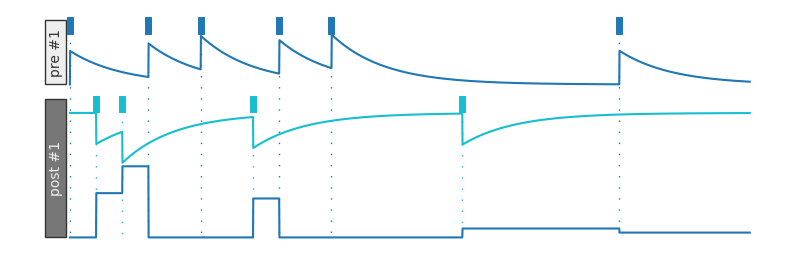

In [29]:
plotDWView(['x  x x  x x          x'],
           [' xx    x       x'])

If our post-synaptic neuron tends to spike *right after* our pre-synaptic neuron, the connection between the two strengthens:

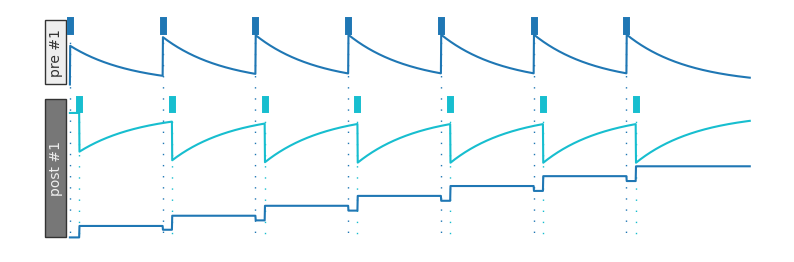

In [30]:
plotDWView(['x  x  x  x  x  x  x'],
           ['x  x  x  x  x  x  x'], offsets={('pre', 0): 0, ('post', 0): 30})

If our post-synaptic neuron tends to spike *right before* our pre-synaptic neuron, the connection between the two weakens (here, setting `g_min` to `-1` so that the weight can be negative):

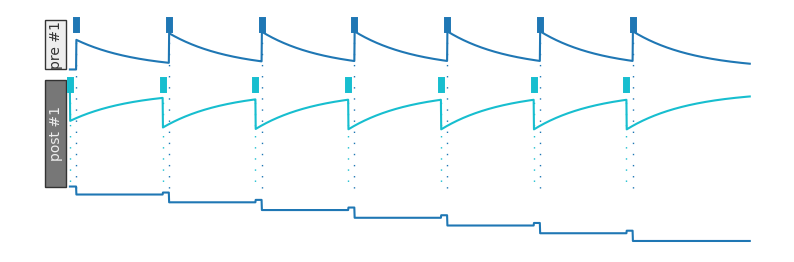

In [31]:

plotDWView(['x  x  x  x  x  x  x'],
           ['x  x  x  x  x  x  x'], offsets={('pre', 0): 20, ('post', 0): 0}, gmin=-1)

If we have multiple pre-synaptic neurons, the post synaptic neuron will have multiple weights (each weight associated with a given pre-synaptic neuron):

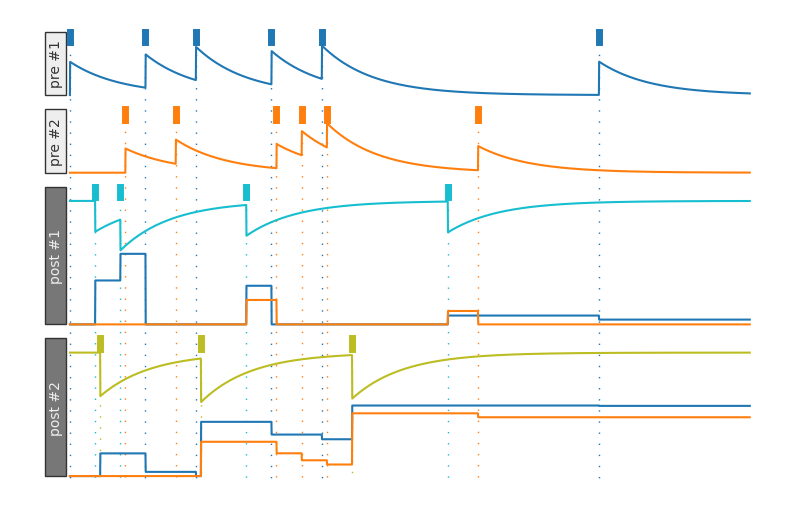

In [34]:
plotDWView(
  # Pre-synaptic spikes
  [
    "x  x x  x x          x",
    "  x x   xxx     x     ",
  ],
  # Post-synaptic spikes
  [
    " xx    x       x       ",
    " x   x     x           ",
  ], offsets={('pre', 0): 0, ('pre', 1): 20, ('post', 0): 0, ('post', 1): 20})

Try changing the values of `a_plus`, `a_minus`, `tau_plus`, and `tau_minus`, `g_min`, and `g_max` to see how the weights change.

```{editor} python
:packages: matplotlib,numpy
:run_on_load: true
:max_height: 600px

import matplotlib.pyplot as plt
import numpy as np

a_plus    = 0.010 #<-SLIDE(0.001 to 0.3 by 0.001)
a_minus   = 0.010 #<-SLIDE(0.001 to 0.3 by 0.001)
tau_plus  = 20    #<-SLIDE(5 to 50 by 1)
tau_minus = 20    #<-SLIDE(5 to 50 by 1)

pre_spikes = [
    "x  x x  x x          x",
    "  x x   xxx     x     ",
]
post_spikes = [
    " xx    x       x       ",
    " x   x     x           ",
]

class STDPWeights:
    def __init__(self, numPre, numPost, tau_plus = 0.02, tau_minus = 0.02, a_plus = 0.01, a_minus = 0.011, g_min=0, g_max=1):
        self.numPre = numPre
        self.numPost = numPost
        self.tau_plus = tau_plus
        self.tau_minus = tau_minus
        self.a_plus = a_plus
        self.a_minus = a_minus
        self.x = np.zeros(numPre)
        self.y = np.zeros(numPost)

        self.g_min = g_min
        self.g_max = g_max
        self.w = np.zeros((numPre, numPost)) # A 2-D array; numPre x numPost zeros (normally would be random)


    def step(self, t_step):
        self.x = self.x * np.exp(-t_step/self.tau_plus)
        self.y = self.y * np.exp(-t_step/self.tau_minus)

    def updateWeights(self, preOutputs, postOutputs):
        self.x += (preOutputs  > 0) * self.a_plus
        self.y -= (postOutputs > 0) * self.a_minus

        alpha_g = self.g_max - self.g_min # Scaling factor for weight updates

        preSpikeIndices = np.where(preOutputs > 0)[0]   # Indices of pre-synaptic   spiking neurons
        postSpikeIndices = np.where(postOutputs > 0)[0]

        for ps_idx in preSpikeIndices:
            self.w[ps_idx] += alpha_g * self.y
            self.w[ps_idx] = np.clip(self.w[ps_idx], self.g_min, self.g_max)

        for ps_idx in postSpikeIndices:
            self.w[:, ps_idx] += alpha_g * self.x
            self.w[:, ps_idx] = np.clip(self.w[:, ps_idx], self.g_min, self.g_max)


SIM_PER_TIME = 100

def str2spikes(s, max_length=None, dt_per_char=SIM_PER_TIME, offset=0):
    if max_length is None: max_length = len(s)

    spikes = []
    for i in range(max_length):
        for _ in range(offset):
            spikes.append(False)
        spikes.append(i < len(s) and s[i] != ' ')
        for _ in range(dt_per_char - offset - 1):
            spikes.append(False)

    return spikes

def clone(arr):
    return arr[:]

def clone2d(arr):
    return [clone(a) for a in arr]

def plotDWView(pre_spike_strs, post_spike_strs, show_w=True, options=None, offsets={}, gmin=0, gmax=1, tau_plus=20.0, tau_minus=20.0, a_plus=0.01, a_minus=0.011):
    if options is None:
        options = {}
        
    max_length_string = max(len(s) for s in pre_spike_strs+post_spike_strs)
    pre_spikes  = [str2spikes(ps, int(max_length_string * 1.2), offset=offsets.get(('pre', idx), 0)) for idx, ps in enumerate(pre_spike_strs)]
    post_spikes = [str2spikes(ps, int(max_length_string * 1.2), offset=offsets.get(('post', idx), 0)) for idx, ps in enumerate(post_spike_strs)]

    all_spikes = pre_spikes + post_spikes

    padding = options.get('display', {}).get('padding', 5)
    label_width = 30
    padding_left = padding + label_width + padding
    padding_between_spike_view = 5
    padding_between_graphs = 20
    padding_between_weight_view = 5

    per_spike_height = 15
    per_graph_height = 70
    per_w_height = 100 if show_w else 0
    
    num_pre_neurons  = len(pre_spikes)
    num_post_neurons = len(post_spikes)
    
    spike_display_height = per_spike_height * (num_pre_neurons + num_post_neurons)
    graph_display_height = per_graph_height * (num_pre_neurons + num_post_neurons)
    dw_display_height = (per_w_height + padding_between_weight_view) * num_post_neurons
    
    height = spike_display_height + graph_display_height + padding_between_spike_view * (num_pre_neurons + num_post_neurons) + dw_display_height + 2 * padding + padding_between_graphs * (num_pre_neurons + num_post_neurons - 1)
    width = options.get('display', {}).get('width', 1000)
    
    fig, ax = plt.subplots(figsize=(width / 100, height / 100))
    
    all_spikes = pre_spikes + post_spikes
    
    sim_time = max(len(s) for s in all_spikes)
    
    # Initialize weights and other variables
    x = np.zeros((sim_time, num_pre_neurons))
    y = np.zeros((sim_time, num_post_neurons))
    w = np.zeros((sim_time, num_pre_neurons, num_post_neurons))
    
    dt = 10 / SIM_PER_TIME
    weights = STDPWeights(num_pre_neurons, num_post_neurons, tau_plus=tau_plus, tau_minus=tau_minus, a_plus=a_plus, a_minus=a_minus, g_min=gmin, g_max=gmax)

    for t in range(sim_time-1):
        preSpikes  = np.array([s[t] for s in pre_spikes])
        postSpikes = np.array([s[t] for s in post_spikes])

        weights.step(dt)
        weights.updateWeights(preSpikes, postSpikes)

        x[t+1] = clone(weights.x)
        y[t+1] = clone(weights.y)
        w[t+1] = clone2d(weights.w) if len(weights.w) > 0 else np.zeros((num_pre_neurons, num_post_neurons))
    
    
    spike_scale_x = np.linspace(padding_left, width + padding, sim_time)
    
    for i in range(num_pre_neurons + num_post_neurons):
        is_pre_synaptic = i < num_pre_neurons
        is_post_synaptic = not is_pre_synaptic
        spikes = all_spikes[i]
        neuron_index = i if is_pre_synaptic else i - num_pre_neurons
        color = plt.get_cmap('tab10')(neuron_index if is_pre_synaptic else 9 - (neuron_index % 10))
        y_loc = padding + i * (per_spike_height + per_graph_height + padding_between_graphs + padding_between_spike_view) + (is_post_synaptic * (per_w_height + padding_between_weight_view) * neuron_index)

        ax.add_patch(plt.Rectangle((padding, y_loc), label_width, per_spike_height + per_graph_height + padding_between_spike_view + (0 if is_pre_synaptic else (per_w_height + padding_between_weight_view)), edgecolor='#333', facecolor='#EEE' if is_pre_synaptic else '#777'))
        ax.text(padding + label_width / 2, y_loc + (per_spike_height + per_graph_height + padding_between_spike_view + (0 if is_pre_synaptic else (per_w_height + padding_between_weight_view))) / 2, f"{'pre' if is_pre_synaptic else 'post'} #{neuron_index + 1}", ha='center', va='center', rotation='vertical', fontsize=10, color='#333' if is_pre_synaptic else '#EEE')
        
        spike_times = [t for t, spike in enumerate(spikes) if spike]

        
        for t in spike_times:
            display_x = spike_scale_x[t]
            ax.plot([display_x, display_x], [y_loc, y_loc + per_spike_height], color=color, linewidth=5)
            ax.plot([display_x, display_x], [y_loc, height], color=color, linewidth=1, linestyle=(0, (1, 7)))

        
        trace_var = x if is_pre_synaptic else y
        trace_val = trace_var[:, neuron_index]
        max_trace_val = np.max(np.abs(trace_val))
        ax.plot(spike_scale_x[:len(trace_val)], -trace_val*(per_graph_height / max_trace_val) + y_loc + per_spike_height + padding_between_spike_view + (per_graph_height if is_pre_synaptic else 0), color=color)
        
        if is_post_synaptic and show_w:
            max_prepost_w = np.max(np.abs(w[:, :, neuron_index]))
            for pre_neuron_index in range(num_pre_neurons):
                pre_color = plt.get_cmap('tab10')(pre_neuron_index)
                prepost_w = w[:, pre_neuron_index, neuron_index]
                ax.plot(spike_scale_x[:len(prepost_w)], -prepost_w*(per_w_height / max_prepost_w) + y_loc + per_graph_height + per_spike_height + per_w_height + 2*padding_between_spike_view, color=pre_color)
    
    plt.gca().invert_yaxis() 
    
    # remove axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # remove ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)

    plt.show()

plotDWView(pre_spikes, post_spikes, tau_plus=tau_plus, tau_minus=tau_minus, a_plus=a_plus, a_minus=a_minus, options={'display':{'width': 750}})
```

Note that there are many small variants on how STDP is implemented, including only updating on pre- or post-synaptic spikes or having multiple updates for each post-synaptic spike. 

## Summary

- In Hebbian learning, we update synaptic weights to ensure that neurons whose firings are correlated and causal build a stronger synapctic connection
- STDP is an implementation of Hebbian learning with update rules (when a pre-synaptic neuron fires at time $t_{pre}$ and a post-synaptic neuron fires at time $t_{post}$):
  - $$ \Delta{}w =
    \begin{cases}
      A_+e^{\frac{(t_{pre}-t_{post})}{\tau_+}}, & \text{if } t_{pre} < t_{post} \\
      -A_{-}e^{\frac{-(t_{pre}-t_{post})}{\tau_{-}}}, & \text{if } t_{pre} \geq t_{post}
    \end{cases}
    $$
    - $A_+$ and $A_-$ specify how much to increment correlated and anti-correlated firing, respectively
    - $\tau_+$ and $\tau_-$ are time constants that specify how quickly our update rule for $\Delta{}w$ should go to $0$

## References

- The Neuromatch Academy has [a helpful overview of STDP](https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial4.html) that helped guide some of the notation and visualizations in this notebook
- The Neuronal Dynamics book has [a more detailed overview of Hebbian learning and STDP](https://neuronaldynamics.epfl.ch/online/Ch19.S2.html)